In [11]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import function to perform linear regression using OLS
import statsmodels.api as sm

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

In [12]:
# load the csv file
df_FWI = pd.read_csv("Final FWI Data.csv")


# display the first five observations
df_FWI.head().T

,0,1,2,3,4
Income,44637.249636,26858.596592,50367.605084,101455.600247,24875.283548
Age,49,34,35,21,52
Dependents,0,2,1,0,4
Occupation,Self_Employed,Retired,Student,Self_Employed,Professional
City_Tier,Tier_1,Tier_2,Tier_3,Tier_3,Tier_2
Rent,13391.174891,5371.719318,7555.140763,15218.340037,4975.05671
Loan_Repayment,0.0,0.0,4612.103386,6809.441427,3112.609398
Insurance,2206.490129,869.522617,2201.80005,4889.418087,635.90717
Groceries,6658.768341,2818.44446,6313.222081,14690.149363,3034.329665
Transport,2636.970696,1543.018778,3221.396403,7106.130005,1276.155163


In [13]:
# check the size of the dataframe
df_FWI.shape

(20000, 37)

In [14]:
df_FWI.dtypes

Income                             float64
Age                                  int64
Dependents                           int64
Occupation                          object
City_Tier                           object
Rent                               float64
Loan_Repayment                     float64
Insurance                          float64
Groceries                          float64
Transport                          float64
Eating_Out                         float64
Entertainment                      float64
Utilities                          float64
Healthcare                         float64
Education                          float64
Miscellaneous                      float64
Desired_Savings_Percentage         float64
Desired_Savings                    float64
Disposable_Income                  float64
Potential_Savings_Groceries        float64
Potential_Savings_Transport        float64
Potential_Savings_Eating_Out       float64
Potential_Savings_Entertainment    float64
Potential_S

In [15]:
# use 'info()' to understand the dataset
df_FWI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

In [16]:
# find total number of missing values in column 'FWI'
df_FWI.isnull().sum()

Income                             0
Age                                0
Dependents                         0
Occupation                         0
City_Tier                          0
Rent                               0
Loan_Repayment                     0
Insurance                          0
Groceries                          0
Transport                          0
Eating_Out                         0
Entertainment                      0
Utilities                          0
Healthcare                         0
Education                          0
Miscellaneous                      0
Desired_Savings_Percentage         0
Desired_Savings                    0
Disposable_Income                  0
Potential_Savings_Groceries        0
Potential_Savings_Transport        0
Potential_Savings_Eating_Out       0
Potential_Savings_Entertainment    0
Potential_Savings_Utilities        0
Potential_Savings_Healthcare       0
Potential_Savings_Education        0
Potential_Savings_Miscellaneous    0
S

In [17]:
# Boolean indicator of missing values
na_data = df_FWI.isnull()

# Row indices where at least one True exists in that row
indices_with_null = na_data.index[na_data.any(axis=1)].tolist()

print(indices_with_null)

[]


In [18]:
# display the total number of null values in each column of dataframe

# 'ascending = False' sorts values in the descending order
Total = df_FWI.isnull().sum().sort_values(ascending=False)          

# percentage of missing values
Percent = (df_FWI.isnull().sum()*100/df_FWI.isnull().count()).sort_values(ascending=False)  

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Income,0,0.0
Potential_Savings_Groceries,0,0.0
Potential_Savings_Eating_Out,0,0.0
Potential_Savings_Entertainment,0,0.0
Potential_Savings_Utilities,0,0.0
Potential_Savings_Healthcare,0,0.0
Potential_Savings_Education,0,0.0
Potential_Savings_Miscellaneous,0,0.0
Savings_ratio,0,0.0
Debt_burden,0,0.0


In [19]:
df_FWI.describe()

,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,...,Savings_ratio,Debt_burden,Rent_burden,Income_norm,Savings_norm,Debt_norm,Rent_norm,Insurance_norm,FWI_raw,FWI
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.158550e+04,41.031450,1.995950,9115.494629,2049.800292,1455.028761,5205.667493,2704.466685,1461.856982,1448.853658,...,0.094163,0.049905,0.219675,0.037355,0.377555,0.249601,0.464500,0.036818,0.339655,36.319592
std,4.001454e+04,13.578725,1.417616,9254.228188,4281.789941,1492.938435,5035.953689,2666.345648,1481.660811,1489.019270,...,0.038527,0.067130,0.055496,0.037105,0.154479,0.335753,0.369973,0.038572,0.107426,11.628943
min,1.301187e+03,18.000000,0.000000,235.365692,0.000000,30.002012,154.078240,81.228584,39.437523,45.421469,...,0.000000,0.000000,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004141,0.000000
25%,1.760488e+04,29.000000,1.000000,3649.422246,0.000000,580.204749,2165.426419,1124.578012,581.011801,581.632906,...,0.066973,0.000000,0.200000,0.015118,0.268537,0.000000,0.333333,0.014215,0.272798,29.082341
50%,3.018538e+04,41.000000,2.000000,6402.751824,0.000000,1017.124681,3741.091535,1933.845509,1029.109726,1020.198376,...,0.086689,0.000000,0.200000,0.026784,0.347590,0.000000,0.333333,0.025504,0.356941,38.190845
75%,5.176545e+04,53.000000,3.000000,11263.940492,2627.142320,1787.160895,6470.892718,3360.597508,1807.075251,1790.104082,...,0.114881,0.106328,0.300000,0.046794,0.460630,0.531805,1.000000,0.045399,0.413850,44.351235
max,1.079728e+06,64.000000,4.000000,215945.674703,123080.682009,38734.932935,119816.898124,81861.503457,34406.100166,38667.368308,...,0.249401,0.199938,0.300000,1.000000,1.000000,1.000000,1.000000,1.000000,0.927922,100.000000


In [20]:
print(df_FWI.columns.tolist())


['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings', 'Disposable_Income', 'Potential_Savings_Groceries', 'Potential_Savings_Transport', 'Potential_Savings_Eating_Out', 'Potential_Savings_Entertainment', 'Potential_Savings_Utilities', 'Potential_Savings_Healthcare', 'Potential_Savings_Education', 'Potential_Savings_Miscellaneous', 'Savings_ratio', 'Debt_burden', 'Rent_burden', 'Income_norm', 'Savings_norm', 'Debt_norm', 'Rent_norm', 'Insurance_norm', 'FWI_raw', 'FWI']


In [21]:
# describe categorical features from dataframe
# include : chooses columns of specified dtype
df_FWI.describe(include=['object'])

,Occupation,City_Tier
count,20000,20000
unique,4,3
top,Retired,Tier_2
freq,5019,10068


In [22]:
# use 'drop_first' to create (n-1) dummy variables
# use 'prefix' to add prefix to dummy variable
df_FWI = pd.get_dummies(df_FWI, columns=['Occupation','City_Tier'], drop_first=True)


In [23]:
# display head of the data
df_FWI.head(5)

,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,...,Debt_norm,Rent_norm,Insurance_norm,FWI_raw,FWI,Occupation_Retired,Occupation_Self_Employed,Occupation_Student,City_Tier_Tier_2,City_Tier_Tier_3
0,44637.249636,49,0,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,1651.801726,1536.184255,...,0.000000,1.000000e+00,0.056233,0.357724,38.275622,False,True,False,False,False
1,26858.596592,34,2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,649.378103,1050.241738,...,0.000000,3.333333e-01,0.021690,0.380954,40.790261,True,False,False,True,False
2,50367.605084,35,1,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,1513.814376,1723.306926,...,0.457986,3.330669e-16,0.056112,0.418509,44.855565,False,False,True,False,True
3,101455.600247,21,0,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,5040.249158,2858.194240,...,0.335691,3.330669e-16,0.125550,0.489862,52.579611,False,True,False,False,True
4,24875.283548,52,4,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,692.827225,660.186852,...,0.625836,3.333333e-01,0.015654,0.258167,27.498440,False,False,False,True,False


In [24]:
# check the size of the dataframe
df_FWI.shape

(20000, 40)

In [25]:
# select the independent variables
X = df_FWI.iloc[:,:16]

# to estimate the regression coefficient , a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_FWI["FWI"]

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.2)

# build a model with an intercept
MLR_model = sm.OLS(y_train, X_train).fit()

In [26]:
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FWI   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     2081.
Date:                Sun, 23 Nov 2025   Prob (F-statistic):               0.00
Time:                        20:28:01   Log-Likelihood:                -52911.
No. Observations:               16000   AIC:                         1.059e+05
Df Residuals:                   15983   BIC:                         1.060e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

<Axes: ylabel='Count'>

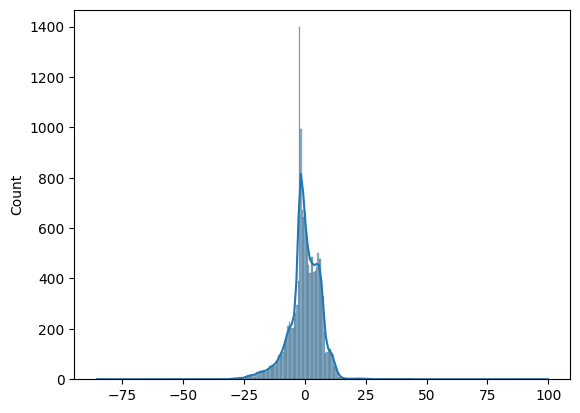

In [27]:
sns.histplot(MLR_model.resid, kde=True)


In [28]:
# Define X and y from the FINAL dataframe
X = df_FWI.drop(columns=['FWI'])   # all predictors
y = df_FWI['FWI']                  # target

# Train–test split (do this AFTER X,y are final)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=10, test_size=0.2
)

# Fit the model on THIS X_train
MLR_model = LinearRegression()
MLR_model.fit(X_train, y_train)

# Now safely compute MSE on train and test
y_pred_train = MLR_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print("MSE for Train Data:", mse_train)

y_pred_test = MLR_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print("MSE for Test Data:", mse_test)


MSE for Train Data: 3.63326403897188e-27
MSE for Test Data: 3.883120705407711e-27


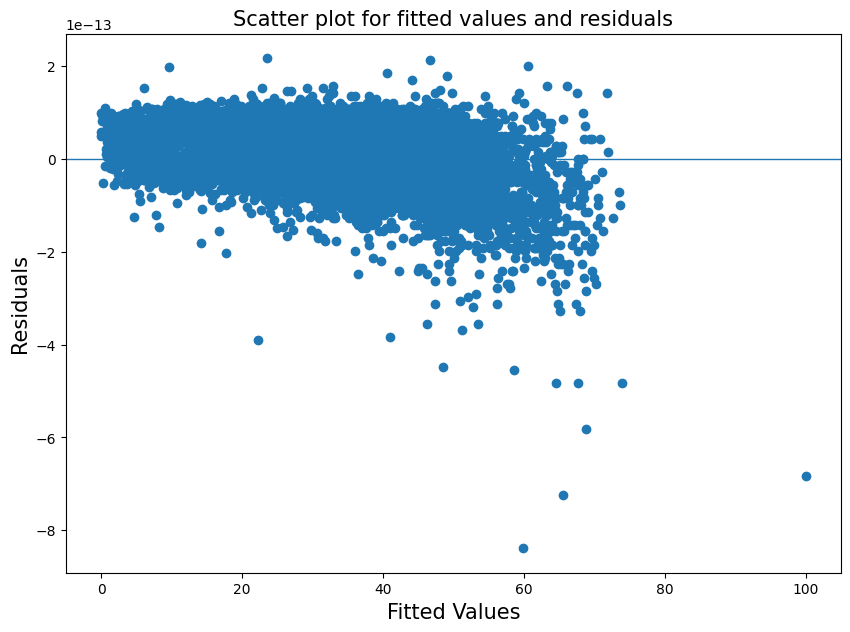

In [29]:
# compute the fitted values (predictions on training data)
y_pred = MLR_model.predict(X_train)

# compute residuals manually
res = y_train - y_pred

# set the figure size 
plt.figure(figsize=(10,7))

# plot a scatter plot for predicted values and residuals
plt.scatter(y_pred, res)

# add plot title
plt.title('Scatter plot for fitted values and residuals', fontsize=15)

# add axis labels
plt.xlabel('Fitted Values', fontsize=15)
plt.ylabel('Residuals', fontsize=15)

# horizontal line at 0
plt.axhline(0, linewidth=1)

# display the plot
plt.show()


In [30]:

# select the variables describing Socio Economic Indiactor : Income, Age, Dependents, Occupation, City_Tier
X = df_FWI.iloc[:,[0,1,2,3,4]]

# set the dependent variable
y = df_FWI['FWI']

# initiate linear regression model
linreg = LinearRegression()

# build the model using X_train and y_train
# use fit() to fit the regression model
MLR_model = linreg.fit(X, y)

# predict the values of target variable using train data
y_pred = MLR_model.predict(X)

# capture all the residuals of the model in a numpy array
residuals = np.array(y - y_pred)

# calculate unexplained_variation 
unexplained_variation = np.sum(residuals**2)

print("The unexplained variation for the model is",unexplained_variation)


The unexplained variation for the model is 1041458.1019641461


In [31]:
# select the variables describing Expense Burden Indiactor: Rent, Loan_Repayment, Insurance, Groceries, Transport
X = df_FWI.iloc[:,[5,6,7,8,9]]

# set the dependent variable
y = df_FWI['FWI']

# initiate linear regression model
linreg = LinearRegression()

# build the model using X_train and y_train
# use fit() to fit the regression model
MLR_model = linreg.fit(X, y)

# predict the values of target variable using train data
y_pred = MLR_model.predict(X)

# capture all the residuals of the model in a numpy array
residuals = np.array(y - y_pred)

# calculate unexplained_variation 
unexplained_variation = np.sum(residuals**2)

print("The unexplained variation for the model is",unexplained_variation)


The unexplained variation for the model is 2284863.156092407


In [32]:

# select the variables describing Other Burden Indiactor: 
X = df_FWI.iloc[:,[10,11,12,13,14,15]]

# set the dependent variable
y = df_FWI['FWI']

# initiate linear regression model
linreg = LinearRegression()

# build the model using X_train and y_train
# use fit() to fit the regression model
MLR_model = linreg.fit(X, y)

# predict the values of target variable using train data
y_pred = MLR_model.predict(X)

# capture all the residuals of the model in a numpy array
residuals = np.array(y - y_pred)

# calculate unexplained_variation 
unexplained_variation = np.sum(residuals**2)

print("The unexplained variation for the model is",unexplained_variation)

The unexplained variation for the model is 1993491.1648864048


In [33]:
# selecting independent variables that describe Socio Economic Indiactor : Income, Age, Dependents, Occupation, City_Tier
X = df_FWI.iloc[:,[0,1,2,3,4]]

# set the dependent variable
y = df_FWI['FWI']

# split data into train subset and test subset 
# set 'random_state' to generate the same dataset each time you run the code  
# 'test_size' returns the proportion of data to be included in the test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)

# fit a model with an intercept using fit() 
# add_constant(): adds the intercept term to the model 
MLR_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()  

# print the summary output 
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FWI   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     4463.
Date:                Sun, 23 Nov 2025   Prob (F-statistic):               0.00
Time:                        20:28:06   Log-Likelihood:                -47545.
No. Observations:               14000   AIC:                         9.510e+04
Df Residuals:                   13994   BIC:                         9.515e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             32.1702      0.222    144.

In [34]:
# selecting independent variables that describe Expense Burden Indiactor: Rent, Loan_Repayment, Insurance, Groceries, Transport	 
X = df_FWI.iloc[:,[5,6,7,8,9]]

# set the dependent variable
y = df_FWI['FWI']

# split data into train subset and test subset 
# set 'random_state' to generate the same dataset each time you run the code  
# 'test_size' returns the proportion of data to be included in the test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)

# fit a model with an intercept using fit() 
# add_constant(): adds the intercept term to the model 
MLR_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()  

# print the summary output 
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FWI   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     533.3
Date:                Sun, 23 Nov 2025   Prob (F-statistic):               0.00
Time:                        20:28:07   Log-Likelihood:                -52998.
No. Observations:               14000   AIC:                         1.060e+05
Df Residuals:                   13994   BIC:                         1.061e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            31.4983      0.130    242.455

In [35]:
# selecting independent variables that describe Other Burden Indiactor: 
X = df_FWI.iloc[:,[10,11,12,13,14]]

# set the dependent variable
y = df_FWI['FWI']

# split data into train subset and test subset 
# set 'random_state' to generate the same dataset each time you run the code  
# 'test_size' returns the proportion of data to be included in the test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)

# fit a model with an intercept using fit() 
# add_constant(): adds the intercept term to the model 
MLR_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()  

# print the summary output 
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FWI   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     707.9
Date:                Sun, 23 Nov 2025   Prob (F-statistic):               0.00
Time:                        20:28:08   Log-Likelihood:                -52641.
No. Observations:               14000   AIC:                         1.053e+05
Df Residuals:                   13994   BIC:                         1.053e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [36]:
# select the variable describing Age
# reshape(): used to change the dimension of input since SGDRegressor expects atleast a 2-D numpy array
X = df_FWI.iloc[:,17].values
X = X.reshape(-1,1)

# set the dependent variable
y = df_FWI['FWI']

# initialize the standard scalar
X_scaler = StandardScaler()

# standardize all the columns of df_FWI
X = X_scaler.fit_transform(X)

# standardize the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2) 

In [37]:
# initiate linear regression model
linreg = LinearRegression()

# build the model using train data
# use fit() to fit the regression model
MLR_model = linreg.fit(X_train, y_train)

# predict the values of target variable using entire data
lin_pred = MLR_model.predict(X_train)

In [38]:
# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd = SGDRegressor(random_state = 1)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(X_train, y_train)

# predict the values of target variable using entire data
sgd_pred = linreg_with_SGD.predict(X_train)

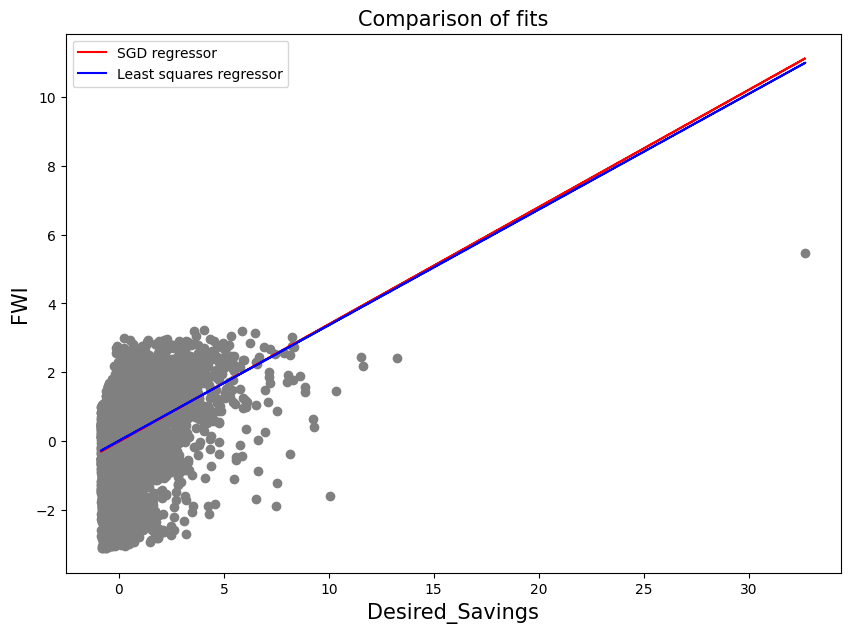

In [39]:
# set the figure size 
plt.figure(figsize=(10,7))

# plot the scatter plot
# colors: set the color of the points in the scatter plot
plt.scatter(X_train, y_train,color='grey')

# set xlabel for the plot
plt.xlabel("Desired_Savings",fontsize = 15)

# set ylabel for the plot
plt.ylabel("FWI",fontsize = 15)

# set title for the plot
plt.title("Comparison of fits",fontsize = 15)

# plot the regression line for the two models
# color: set the color of the line
# label: set the label of the line for the legend
plt.plot(X_train,sgd_pred,color='red',label='SGD regressor')
plt.plot(X_train,lin_pred,color='blue',label='Least squares regressor')

# set the position of legend
plt.legend(loc='upper left')

# disply the plot
plt.show()

In [40]:
# selecting the variables describing Socio Economic Indiactor : Income, Age, Dependents, Occupation, City_Tier
X = df_FWI.iloc[:,[0,1,2,3,4]]

# set the dependent variable
y = df_FWI['FWI']

# initializing the standard scalar
X_scaler = StandardScaler()

# standardizing all the columns of df_ipl
X = X_scaler.fit_transform(X)

# standardizing the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.2)

In [41]:
# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd = SGDRegressor(random_state = 1)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(X_train, y_train)

# initiate linear regression model
linreg = LinearRegression()

# build the model using train data
# use fit() to fit the regression model
MLR_model = linreg.fit(X_train, y_train)

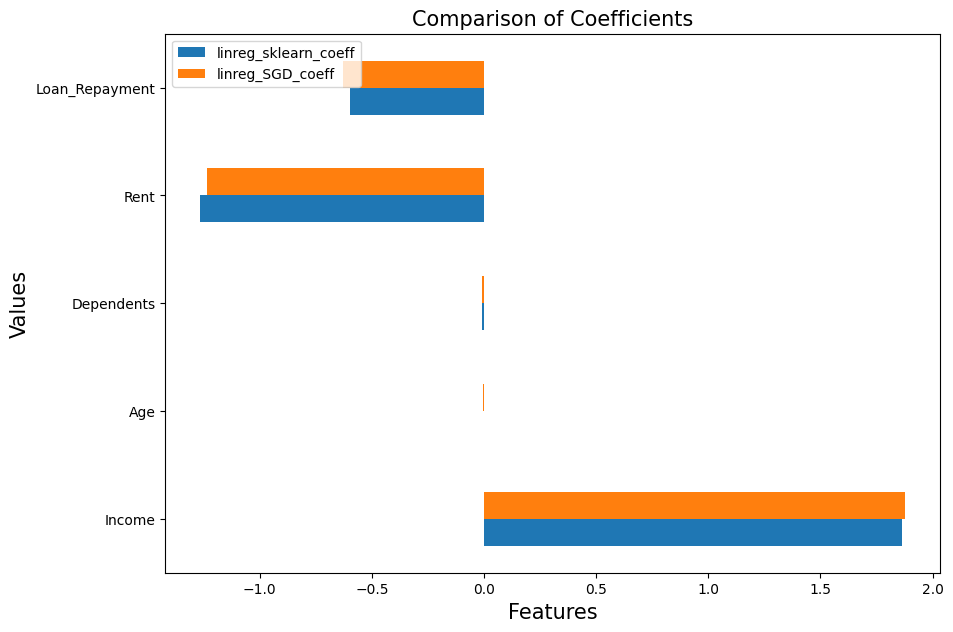

In [42]:
# create a dataframe of variables descibing 
df_SocioEconomicIndicator = df_FWI.iloc[:,[0,1,2,3,4]]

# create a dataframe containing the beta coefficients for the linear regression models build using sklearn and SGD 
# 'coef_' returns the value of each coefficient
# pass the required column names to the parameter, 'columns'
# pass the row indexes to the parameter, 'index'
df_coeff = pd.DataFrame([MLR_model.coef_, linreg_with_SGD.coef_], columns = df_SocioEconomicIndicator.columns, 
                 index = ['linreg_sklearn_coeff', 'linreg_SGD_coeff'])

# plot a side by side bar graph
# 'T' returns the transposed dataframe 
# set figure size using 'figsize'
fig = df_coeff.T.plot.barh( figsize=(10,7))

# set axes and plot labels
# set the text size using 'fontsize'
plt.title('Comparison of Coefficients', fontsize = 15)
fig.set_xlabel('Features', fontsize = 15)
fig.set_ylabel('Values', fontsize = 15)

# set the x-axis labels horizontally
plt.xticks(rotation = 'horizontal')

# set the position of legend
fig.legend(loc='upper left')

# display the plot
plt.show()





In [43]:
# selecting the independent variables
X = df_FWI.iloc[:,:16]

# set the dependent variable
y = df_FWI['FWI']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.2)

In [44]:
# initiate linear regression model
linreg = LinearRegression()

# build the model using train data
# use fit() to fit the regression model
MLR_model = linreg.fit(X_train, y_train)

# For training set:
# train_pred: prediction made by the model on the training dataset 'X_train'
# y_train: actual values ofthe target variable for the train dataset
 
# predict the output of the target variable from the train data 
train_pred = MLR_model.predict(X_train)

# calculate the MSE using the "mean_squared_error" function
# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)
 
# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
    
# For testing set:
# test_pred: prediction made by the model on the test dataset 'y_train'
# y_test: actual values of the target variable for the test dataset
 
# predict the output of the target variable from the test data
test_pred = MLR_model.predict(X_test)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  6.6062
Root Mean Squared Error (RMSE) on test set:  7.1031


In [45]:
# obtain the R-squared
r_square = MLR_model.score(X_train, y_train)

# obtain the adj. R-squared
adj_r_square = 1 - ((1-r_square)*(172)/(173-16-1))

# print the R-squared and adj. R-squared values
print("The R-squared value is", r_square, "and the adjusted R-squared", adj_r_square )

The R-squared value is 0.6756649036202116 and the adjusted R-squared 0.6423997655299769


In [46]:
# Full model using Full batch Gradient Descent:

# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd = SGDRegressor(loss='squared_error', penalty='l2', alpha=0.0001,
                        learning_rate='optimal', random_state = 1)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(X_train, y_train)
# Make predictions on your train data
y_pred_train = linreg_with_SGD.predict(X_train)
# Make predictions on your test data
y_pred_test = linreg_with_SGD.predict(X_test)
mse_train = mean_squared_error(y_train, y_pred_train)
print ("MSE for Train Data:",mse_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print ("MSE for Test Data:",mse_test)

MSE for Train Data: 4.708659254164984e+37
MSE for Test Data: 5.031180619252866e+37


In [58]:
# Full model using Mini-Batch Gradient Descent:

# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd_minibatch = SGDRegressor(loss='squared_error', penalty='l2', alpha=0.0001,
                        learning_rate='optimal', random_state = 1)
# Parameters
batch_size = 20
n_batches = X_train.shape[0] // batch_size

# Mini-batch gradient descent loop
for epoch in range(100):  # number of epochs
    for i in range(n_batches):
        # Create mini-batch
        start_index = i * batch_size
        end_index = start_index + batch_size
        X_batch = X_train[start_index:end_index]
        y_batch = y_train[start_index:end_index]

        # Update the model using the mini-batch
        sgd_minibatch.partial_fit(X_batch, y_batch)

# Make predictions on your test data
y_pred_test = sgd_minibatch.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print ("MSE for Test Data:",mse_test)

MSE for Test Data: 4.903803385679441e+37


In [59]:
# Full model using Stochastic Gradient Descent:

# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd_minibatch = SGDRegressor(loss='squared_error', penalty='l2', alpha=0.0001,
                        learning_rate='optimal', random_state = 1)
# Parameters
batch_size = 1
n_batches = X_train.shape[0] // batch_size

# Mini-batch gradient descent loop
for epoch in range(100):  # number of epochs
    for i in range(n_batches):
        # Create mini-batch
        start_index = i * batch_size
        end_index = start_index + batch_size
        X_batch = X_train[start_index:end_index]
        y_batch = y_train[start_index:end_index]

        # Update the model using the mini-batch
        sgd_minibatch.partial_fit(X_batch, y_batch)

# Make predictions on your test data
y_pred_test = sgd_minibatch.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print ("MSE for Test Data:",mse_test)

MSE for Test Data: 2.168538035593123e+38


In [60]:
# check the datatype of the variable
print("Data type of target variable:",df_FWI.FWI.dtype)

Data type of target variable: float64


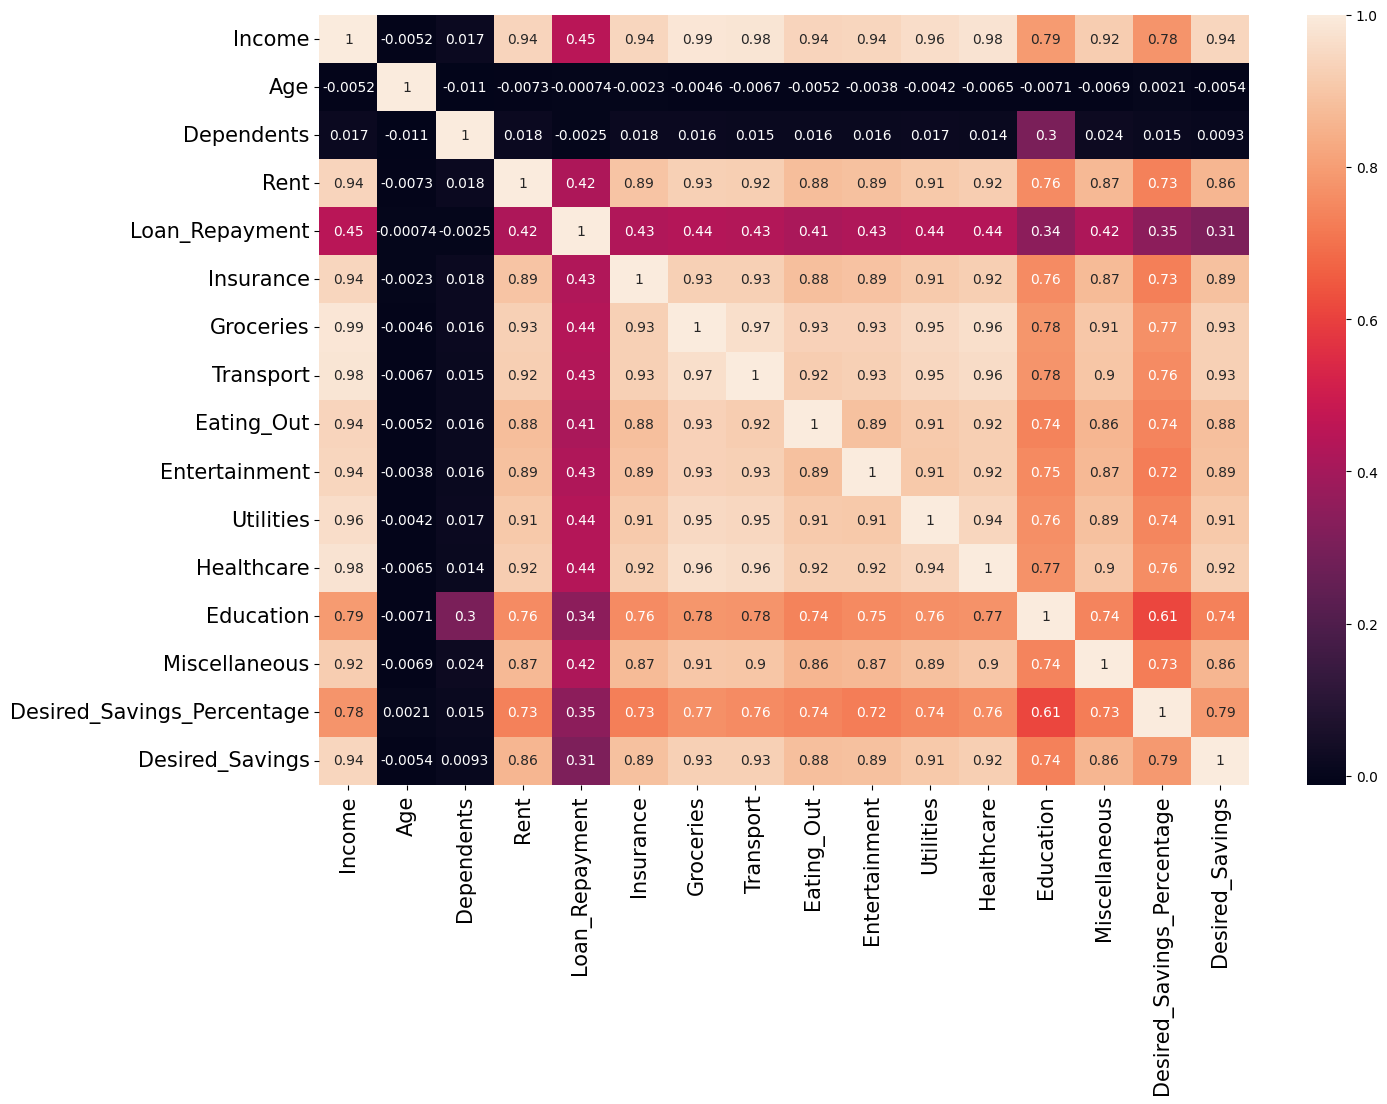

In [61]:
# set dimensions for the plot figure
fig_dims = (15,10)
fig, ax = plt.subplots(figsize=fig_dims)

# create a copy of dataframe
df_features = df_FWI.iloc[:,:16]

# plot the heat map
# corr: give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(df_features.corr(), annot = True, annot_kws = {"size": 10})

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

In [62]:
# selecting the independent variables 
X = df_FWI.iloc[:,:16]

# set the dependent variable
y = df_FWI['FWI']

# initializing the standard scalar
X_scaler = StandardScaler()

# standardizing all the columns of df_ipl
X = X_scaler.fit_transform(X)

# standardizing the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=110, test_size = 0.2)

In [63]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
ridge = Ridge(alpha = 10.0)

# fit the model on train set using fit()
ridge_model = ridge.fit(X_train, y_train)

# For training set:
# train_pred: prediction made by the model on the training dataset 'X_train'
# y_train: actual values ofthe target variable for the train dataset
 
# predict the output of the target variable from the train data 
train_pred = ridge_model.predict(X_train)

# calculate the MSE using the "mean_squared_error" function
# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)
 
# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
    
# For testing set:
# test_pred: prediction made by the model on the test dataset 'y_train'
# y_test: actual values of the target variable for the test dataset
 
# predict the output of the target variable from the test data
test_pred = ridge_model.predict(X_test)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  0.58
Root Mean Squared Error (RMSE) on test set:  0.5634


In [64]:
# selecting the variables describing Expense Burden Indiactor: Rent, Loan_Repayment, Insurance, Groceries, Transport
# selecting the variables describing Socio Economic Indiactor : Income, Age, Dependents, Occupation, City_Tier
X = df_FWI.iloc[:,[5,6,7,8,9,1,1,2,3,4]]

# to estimate the regression coefficient , a constant termof '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)


# set the dependent variable
y = df_FWI['FWI']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.2)

In [65]:
# building a model with an intercept
MLR_model = sm.OLS(y_train, X_train).fit()

# For training set:
# train_pred: prediction made by the model on the training dataset 'X_train'
# y_train: actual values ofthe target variable for the train dataset
 
# predict the output of the target variable from the train data 
train_pred = MLR_model.predict(X_train)

# calculate the MSE using the "mean_squared_error" function
# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)
 
# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
    
# For testing set:
# test_pred: prediction made by the model on the test dataset 'y_train'
# y_test: actual values of the target variable for the test dataset
 
# predict the output of the target variable from the test data
test_pred = MLR_model.predict(X_test)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  7.4369
Root Mean Squared Error (RMSE) on test set:  8.1388


In [66]:
# calculate p-values for all the variables
MLR_pvalues = pd.DataFrame(MLR_model.pvalues, columns = ["P-Value"])

# filter the variables with p-value less than 0.05
significant_var = MLR_pvalues[MLR_pvalues['P-Value'] < 0.05]

# get significant variables using index
# to_list: converts the variables to 'list' type
signi_var = significant_var.index.to_list()

# print the list of significant variables
signi_var

['const',
 'Insurance',
 'Groceries',
 'Transport',
 'Eating_Out',
 'Entertainment',
 'Rent',
 'Loan_Repayment']

In [67]:
# selecting the variables describing Expense Burden Indiactor: Rent, Loan_Repayment, Insurance, Groceries, Transport
# selecting the variables describing Socio Economic Indiactor : Income, Age, Dependents, Occupation, City_Tier
X = df_FWI.iloc[:,[5,6,7,8,9,0,1,2,3,4]]

# create a dataframe to capture the features used in model
df_features = df_FWI.iloc[:,[9,10,11,3,8]]

# set the dependent variable
y = df_FWI['FWI']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30, test_size = 0.2)

In [68]:
# initiate linear regression model
linreg = LinearRegression()

# build the model using train data
# use fit() to fit the regression model
MLR_model = linreg.fit(X_train, y_train)

# For training set:
# train_pred: prediction made by the model on the training dataset 'X_train'
# y_train: actual values ofthe target variable for the train dataset
 
# predict the output of the target variable from the train data 
train_pred = MLR_model.predict(X_train)

# calculate the MSE using the "mean_squared_error" function
# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)
 
# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
# For testing set:
# test_pred: prediction made by the model on the test dataset 'y_train'
# y_test: actual values of the target variable for the test dataset
 
# predict the output of the target variable from the test data
test_pred = MLR_model.predict(X_test)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)
    

Root Mean Squared Error (RMSE) on training set:  7.1756
Root Mean Squared Error (RMSE) on test set:  7.2777


In [69]:
# initialize the standard scalar
X_scaler = StandardScaler()

# standardize all the columns of the dataframe 'X'
X = X_scaler.fit_transform(X)

# standardize the target variable explicitly 
y = (y - y.mean()) / y.std()

In [70]:
# use Lasso() to perform lasso regression
# 'alpha' assigns the regularization strength to the model
lasso = Lasso(alpha = 0.1)

# fit the model on train set using fit()
lasso_model = lasso.fit(X_train, y_train)

# For training set:
# train_pred: prediction made by the model on the training dataset 'X_train'
# y_train: actual values ofthe target variable for the train dataset
 
# predict the output of the target variable from the train data 
train_pred = lasso_model.predict(X_train)

# calculate the MSE using the "mean_squared_error" function
# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)
 
# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
    
# For testing set:
# test_pred: prediction made by the model on the test dataset 'y_train'
# y_test: actual values of the target variable for the test dataset
 
# predict the output of the target variable from the test data
test_pred = lasso_model.predict(X_test)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  7.1759
Root Mean Squared Error (RMSE) on test set:  7.2785


In [71]:
# X was created like this earlier:
X = df_FWI.drop(columns=['FWI'])   # all independent variables
y = df_FWI['FWI']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)

# Fit Lasso on X_train (DataFrame, not .values)
lasso_model = Lasso(alpha=1).fit(X_train, y_train)

# Now get feature names from X_train (this HAS .columns)
feature_names = X_train.columns

# Create dataframe of coefficients
df_lasso_coeff = pd.DataFrame({
    'Variable': feature_names,
    'Coefficient': lasso_model.coef_
})

print(
    'Least significant variables obtained from Lasso Regression when alpha is 1:',
    df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list()
)


Least significant variables obtained from Lasso Regression when alpha is 1: ['Age', 'Dependents', 'Savings_ratio', 'Debt_burden', 'Rent_burden', 'Income_norm', 'Savings_norm', 'Insurance_norm', 'FWI_raw', 'Occupation_Retired', 'Occupation_Self_Employed', 'Occupation_Student', 'City_Tier_Tier_2', 'City_Tier_Tier_3']


In [72]:
# selecting the independent variables 
X = df_FWI.iloc[:,:16]

# set the dependent variable
y = df_FWI['FWI']

# initializing the standard scalar
X_scaler = StandardScaler()

# standardizing all the columns of df_ipl
X = X_scaler.fit_transform(X)

# standardizing the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=110, test_size = 0.2)

In [73]:
# use ElasticNet() to perform Elastic Net regression
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.0001)

# fit the model on train data using fit()
enet_model = enet.fit(X_train, y_train)

# predict the values of target variable using test data
y_test_pred = enet_model.predict(X_test)

# For training set:
# train_pred: prediction made by the model on the training dataset 'X_train'
# y_train: actual values ofthe target variable for the train dataset
 
# predict the output of the target variable from the train data 
train_pred = enet_model.predict(X_train)

# calculate the MSE using the "mean_squared_error" function
# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)
 
# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
    
# For testing set:
# test_pred: prediction made by the model on the test dataset 'y_train'
# y_test: actual values of the target variable for the test dataset
 
# predict the output of the target variable from the test data
test_pred = enet_model.predict(X_test)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)
# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  0.6365
Root Mean Squared Error (RMSE) on test set:  0.6184


In [74]:
# selecting the independent variables 
X = df_FWI.iloc[:,:16]

# set the dependent variable
y = df_FWI['FWI']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

In [75]:
# initiate linear regression model
linreg = LinearRegression()

# build the model using train data
# use fit() to fit the regression model
MLR_model = linreg.fit(X_train, y_train)

# For training set:
# train_pred: prediction made by the model on the training dataset 'X_train'
# y_train: actual values ofthe target variable for the train dataset
 
# predict the output of the target variable from the train data 
train_pred = MLR_model.predict(X_train)

# calculate the MSE using the "mean_squared_error" function
# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)
 
# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
    
# For testing set:
# test_pred: prediction made by the model on the test dataset 'y_train'
# y_test: actual values of the target variable for the test dataset
 
# predict the output of the target variable from the test data
test_pred = MLR_model.predict(X_test)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  6.6062
Root Mean Squared Error (RMSE) on test set:  7.1031


In [76]:
# obtain the R-squared
r_square = MLR_model.score(X_train, y_train)

# obtain the adj. R-squared
adj_r_square = 1 - ((1-r_square)*(172)/(173-16-1))

# print the R-squared and adj. R-squared values
print("The R-squared value is", r_square, "and the adjusted R-squared", adj_r_square )

The R-squared value is 0.6756649036202116 and the adjusted R-squared 0.6423997655299769


In [77]:
# select the independent variables 
X = df_FWI.iloc[:,:19]

# set the dependent variable
y = df_FWI['FWI']

# initialize the standard scalar
X_scaler = StandardScaler()

# standardize all the columns of df_lifeExp
X = X_scaler.fit_transform(X)

# standardize the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=110, test_size = 0.2)

In [78]:
# 'alpha' assigns the regularization strength to the model
tuned_paramaters = [{'alpha':[7,8,9,10,11]}]
 
# instantiate the Ridge() method
ridge = Ridge()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 5)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Ridge Regression:', ridge_grid.best_params_)

Best parameters for Ridge Regression: {'alpha': 11}


In [79]:
# select the variables describing Expense Burden Indiactor: Rent, Loan_Repayment, Insurance, Groceries, Transport
# selecting the variables describing Socio Economic Indiactor : Income, Age, Dependents, Occupation, City_Tier
X = df_FWI.iloc[:,[5,6,7,8,9,0,1,2,3,4]]

# set the dependent variable
y = df_FWI['FWI']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size = 0.2)

In [80]:
# create a dictionary with hyperparameters and its values
tuned_paramaters = [{'alpha':[0.1,0.5,1,1.5,2,2.5,3,3.5,4],
                      'l1_ratio':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}]
 
# instantiate the ElasticNet() method
enet = ElasticNet()

# using GridSearchCV to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train
enet_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for ELastic-net Regression: ', enet_grid.best_params_, '\n')

Best parameters for ELastic-net Regression:  {'alpha': 0.1, 'l1_ratio': 0.5} 



In [81]:
# selecte the independent variables 
X = df_FWI.iloc[:,:16]

# set the dependent variable
y = df_FWI['FWI']

# initialize the standard scalar
X_scaler = StandardScaler()

# standardize all the columns of df_lifeExp
X = X_scaler.fit_transform(X)

# standardize the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=110, test_size = 0.2)

In [82]:
# create a dictionary with hyperparameters and its values
# 'l1_ratio' is the elastic net mixing parameter
tuned_paramaters = [{'l1_ratio':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}]

# instantiate the ElasticNet() method
enet = ElasticNet(alpha=0.8)

# use GridSearchCV() to find the optimal value of l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
enet_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

Best parameters for Elastic Net Regression:  {'l1_ratio': 0.001} 

